# (sFigure19)-Functional Analysis for Subtypes of Enterocytes in H. pylori Infection.

In [10]:
import anndata as ad
import scanpy as sc
import omicverse as ov
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_style('white')

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [11]:
adata = sc.read_h5ad('Gastric/Data/Epi_anno.h5ad')
adata.uns['Epi_celltype_colors'] = [ov.pl.blue_color[2],ov.pl.blue_color[3],ov.pl.red_color[4],ov.pl.blue_color[5],
                                  ov.pl.red_color[0],ov.pl.red_color[2],ov.pl.red_color[1]]
adata_Enterocytes = adata[adata.obs['Epi_celltype'].isin(['IM_Enterocytes'])]
adata_Enterocytes

View of AnnData object with n_obs × n_vars = 5195 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Epi_celltype', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'Epi_celltype_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [12]:
sc.pp.neighbors(adata_Enterocytes, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(adata_Enterocytes)
sc.pl.paga(adata_Enterocytes, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_Enterocytes,init_pos='paga')

computing neighbors


2024-08-18 16:13:11.678620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 16:15:47.191058: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-18 16:17:48.842755: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:06:29)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [13]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
#pathway_dict

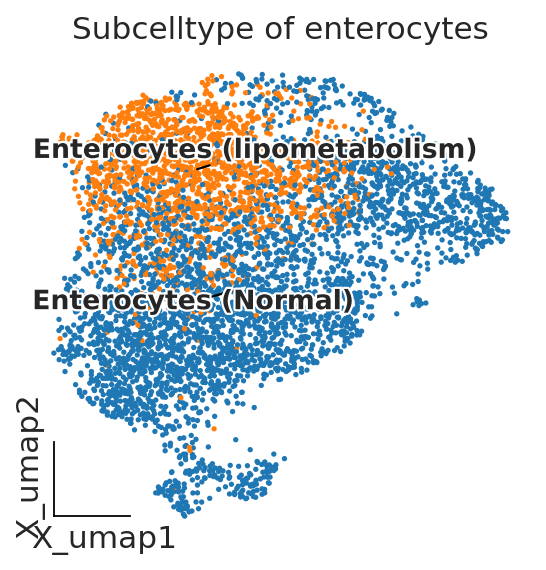

In [15]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
adata_Enterocytes.obs['Lipometabolism_type'] = 'Enterocytes (Normal)'
adata_Enterocytes.obs.loc[adata_Enterocytes.obs['Lipometabolism pathway']>2,'Lipometabolism_type']='Enterocytes (lipometabolism)'
fig,ax=plt.subplots( figsize = (4,4))
ov.pl.embedding(adata_Enterocytes,
                basis='X_umap',
                color=['Lipometabolism_type',],title='Subcelltype of enterocytes',
                frameon='small',cmap='RdBu_r',ax=ax,legend_loc=None,
                show=False,)
ov.pl.embedding_adjust(
    adata_Enterocytes,
    groupby='Lipometabolism_type',
    exclude=("OL",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

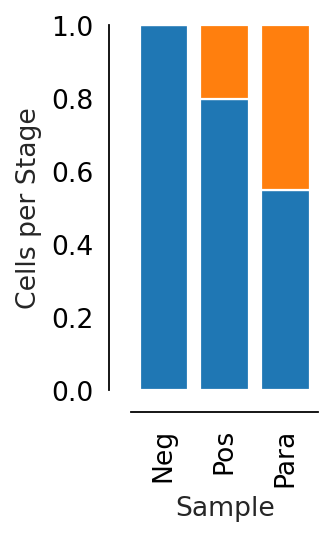

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (1.5,3))
ov.pl.cellproportion(adata=adata_Enterocytes,celltype_clusters='Lipometabolism_type',
                    groupby='Sample',legend=False,ax=ax)
fig.savefig('Gastric/Figure/sFigure19/sFigure19_A.png', dpi=300,bbox_inches = 'tight')

In [19]:
adata_Enterocytes_obs = adata_Enterocytes.obs
adata_Enterocytes = adata_Enterocytes.raw.to_adata()

In [20]:
# filter 核糖体基因
adata_Enterocytes = adata_Enterocytes[:,~adata_Enterocytes.var_names.str.contains('RPS')]
adata_Enterocytes = adata_Enterocytes[:,~adata_Enterocytes.var_names.str.contains('RPL')]
adata_Enterocytes.obs = adata_Enterocytes_obs
#normalize and high variable genes (HVGs) calculated
adata_Enterocytes=ov.pp.preprocess(adata_Enterocytes,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
adata_Enterocytes.raw = adata_Enterocytes
adata_Enterocytes = adata_Enterocytes[:, adata_Enterocytes.var.highly_variable_features]

adata_Enterocytes.layers['lognorm'] = adata_Enterocytes.X
adata_Enterocytes

Begin robust gene identification
After filtration, 26102/32115 genes are kept. Among 26102 genes, 21216 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
Time to analyze data in cpu: 2.388261556625366 seconds.
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 5195 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Epi_celltype', 'Lipometabolism pathway', 'Lipometabolism_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'dispersions', 'dispersions_norm', 'percent_cells', 'robust', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Epi_celltype', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'Epi_celltype_colors', 'Lipometabolism_type_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts', 'lognorm

In [38]:
# PC
dds=ov.bulk.pyDEG(adata_Enterocytes.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=adata_Enterocytes[adata_Enterocytes.obs['Lipometabolism_type']=='Enterocytes (lipometabolism)'].obs.index.tolist()
control_groups=adata_Enterocytes[adata_Enterocytes.obs['Lipometabolism_type']=='Enterocytes (Normal)'].obs.index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=1,
                   pval_threshold=0.05,
                   logp_max=50)


... drop_duplicates_index success
... Fold change threshold: 1


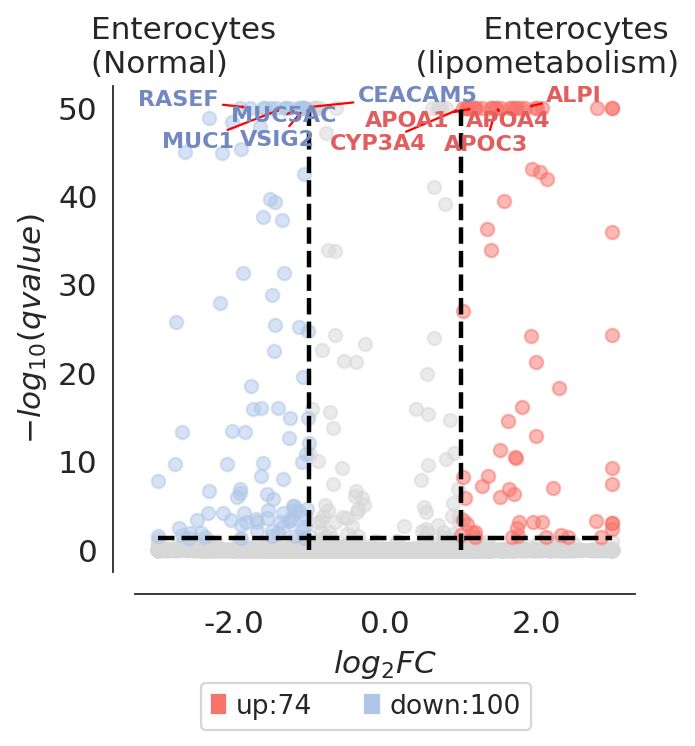

In [39]:
dds.result.loc[dds.result.loc[:,'log2FC']<-3,'log2FC']=-3
dds.result.loc[dds.result.loc[:,'log2FC']>3,'log2FC']=3
ax = dds.plot_volcano(title='Enterocytes                     Enterocytes \n(Normal)                   (lipometabolism)',figsize=(4,4)
                      ,down_color='#aec7e8',up_color='#f8736a', 
                 plot_genes_num=10,plot_genes_fontsize=10,legend_bbox=(0.82, -0.2),)#plot_genes=['GZMK','CTLA4','GNLY'])
plt.savefig('Gastric/Figure/sFigure19/sFigure19_D.png', dpi=300,bbox_inches = 'tight')

computing score 'epithelial structure maintenance'
    finished: added
    'epithelial structure maintenance', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)


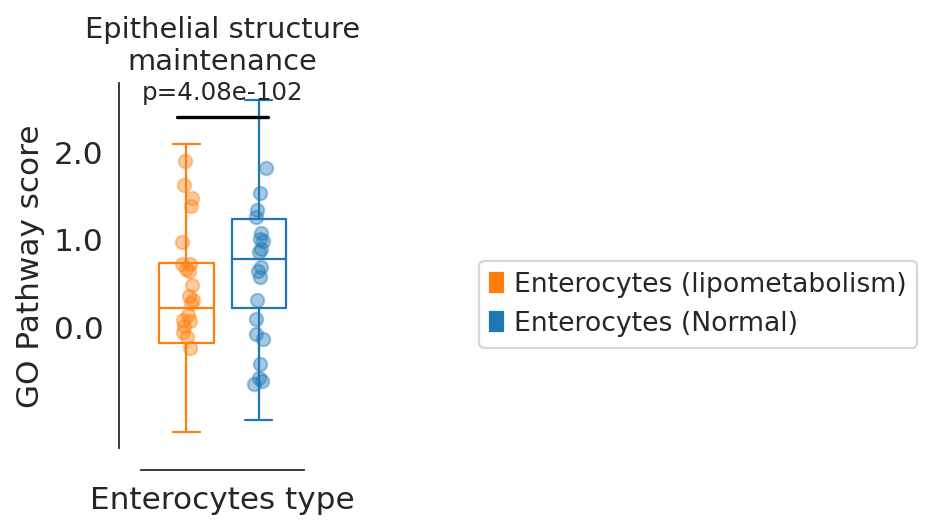

In [366]:

select_gene =  pathway_dict['maintenance of gastrointestinal epithelium (GO:0030277)']
#select_gene = pathway_dict['T cell activation (GO:0042110)']
sc.tl.score_genes(adata_Enterocytes, select_gene, score_name='epithelial structure maintenance')
group_lipometabolism = adata_Enterocytes[adata_Enterocytes.obs['Lipometabolism_type'] == 'Enterocytes (lipometabolism)'].obs['epithelial structure maintenance']
group_normal = adata_Enterocytes[adata_Enterocytes.obs['Lipometabolism_type'] == 'Enterocytes (Normal)'].obs['epithelial structure maintenance']
t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_normal, group_lipometabolism)
p_value_neg_pos = f'{p_value_neg_pos:.2e}' if p_value_neg_pos < 0.0001 else f'{p_value_neg_pos:.4f}'

fig,ax=ov.pl.boxplot(adata_Enterocytes.obs,x_value='label',y_value='epithelial structure maintenance',hue='Lipometabolism_type',
              palette=['#ff7f0e','#1f77b4',],legend_bbox=(2,0.55),
              figsize=(1.3,3),fontsize=12,title='Epithelial structure\nmaintenance',)
ax.set_ylabel("GO Pathway score")
ov.pl.add_palue(ax,line_x1=-0.5,line_x2=0.5,line_y=2.4,
          text_y=0.2,
          text='p={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
          horizontalalignment='center',)
fig.savefig("Gastric/Figure/sFigure19/sFigure19_B_1",dpi=300,bbox_inches = 'tight')


computing score 'chylomicron assembly'
    finished: added
    'chylomicron assembly', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)


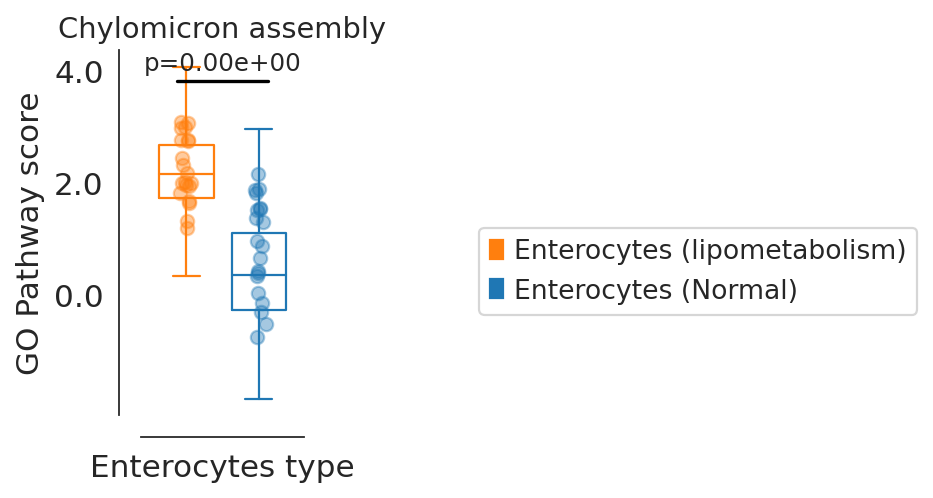

In [365]:

select_gene =  pathway_dict['chylomicron assembly (GO:0034378)']
#select_gene = pathway_dict['T cell activation (GO:0042110)']
sc.tl.score_genes(adata_Enterocytes, select_gene, score_name='chylomicron assembly')
group_lipometabolism = adata_Enterocytes[adata_Enterocytes.obs['Lipometabolism_type'] == 'Enterocytes (lipometabolism)'].obs['chylomicron assembly']
group_normal = adata_Enterocytes[adata_Enterocytes.obs['Lipometabolism_type'] == 'Enterocytes (Normal)'].obs['chylomicron assembly']
t_stat_neg_pos,p_value_neg_pos = ttest_ind(group_normal, group_lipometabolism)
p_value_neg_pos = f'{p_value_neg_pos:.2e}' if p_value_neg_pos < 0.0001 else f'{p_value_neg_pos:.4f}'

fig,ax=ov.pl.boxplot(adata_Enterocytes.obs,x_value='label',y_value='chylomicron assembly',hue='Lipometabolism_type',
              palette=['#ff7f0e','#1f77b4',],legend_bbox=(2,0.55),
              figsize=(1.3,3),fontsize=12,title='Chylomicron assembly',)
ax.set_ylabel("GO Pathway score")
ov.pl.add_palue(ax,line_x1=-0.5,line_x2=0.5,line_y=3.8,
          text_y=0.2,
          text='p={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
          horizontalalignment='center',)
fig.savefig("Gastric/Figure/sFigure19/sFigure19_B_2",dpi=300,bbox_inches = 'tight')


... storing 'mean' as categorical
... storing 'var' as categorical
... storing 'mean' as categorical
... storing 'var' as categorical
... storing 'mean' as categorical
... storing 'var' as categorical


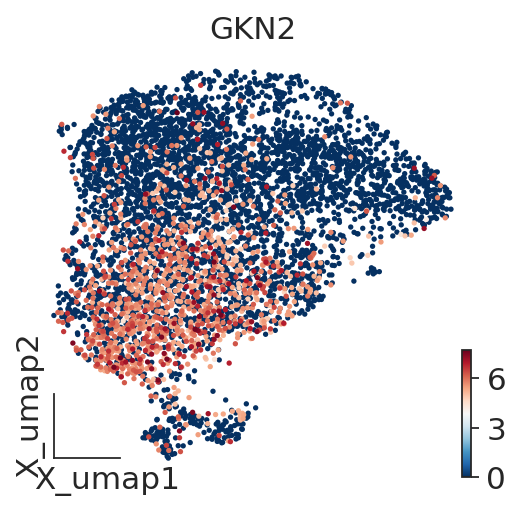

In [421]:
fig,ax=plt.subplots( figsize = (3.5,3.5))
ov.pl.embedding(adata_Enterocytes,
                basis='X_umap',
                color=['GKN2',],
                frameon='small',cmap='RdBu_r',ax=ax,
                show=False,)
fig.savefig("Gastric/Figure/sFigure19/sFigure19_C_1",dpi=300,bbox_inches = 'tight')


... storing 'mean' as categorical
... storing 'var' as categorical
... storing 'mean' as categorical
... storing 'var' as categorical
... storing 'mean' as categorical
... storing 'var' as categorical


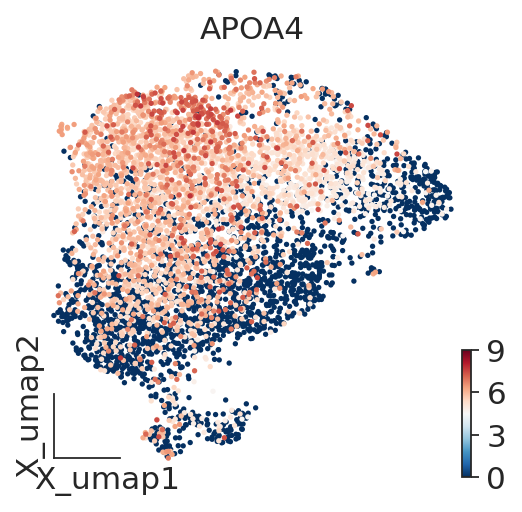

In [422]:
fig,ax=plt.subplots( figsize = (3.5,3.5))
ov.pl.embedding(adata_Enterocytes,
                basis='X_umap',
                color=['APOA4',],
                frameon='small',cmap='RdBu_r',ax=ax,vmax=9,
                show=False,)
fig.savefig("Gastric/Figure/sFigure19/sFigure19_C_2",dpi=300,bbox_inches = 'tight')
